## CREDIT CARD FRAUD DETECTION

# Problem Statement - Developing a classification model to classify whether credit card transaction is fake or genuine

About Dataset - The dataset contains transactions made by credit cards in September 2013 by European cardholders. It consist of 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables where Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. Original information about features not provided due to confidentiality    


dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# import Packages

# Loading Dataset

In [6]:
data=pd.read_csv("/home/Alaina/Downloads/creditcard.csv")

# Data Preprocessing

In [7]:
#check null values
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Display Column Names
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#Display First Five Row
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#Display Last Five Rows
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
#checking dataset Shape-(Number of Row,Number of Column)
data.shape

(284807, 31)

In [12]:
#Checking Datatype of Each Column
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Input Split

In [13]:
X=data[[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28' ]]

In [14]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [15]:
#target variable
Y= data['Class']

In [16]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [17]:
#checking unique values
Y.unique()

array([0, 1])

In [18]:
#checking each unique value count
value_counts = Y.value_counts()

In [19]:
value_counts

Class
0    284315
1       492
Name: count, dtype: int64

# Exploratory Data Analysis

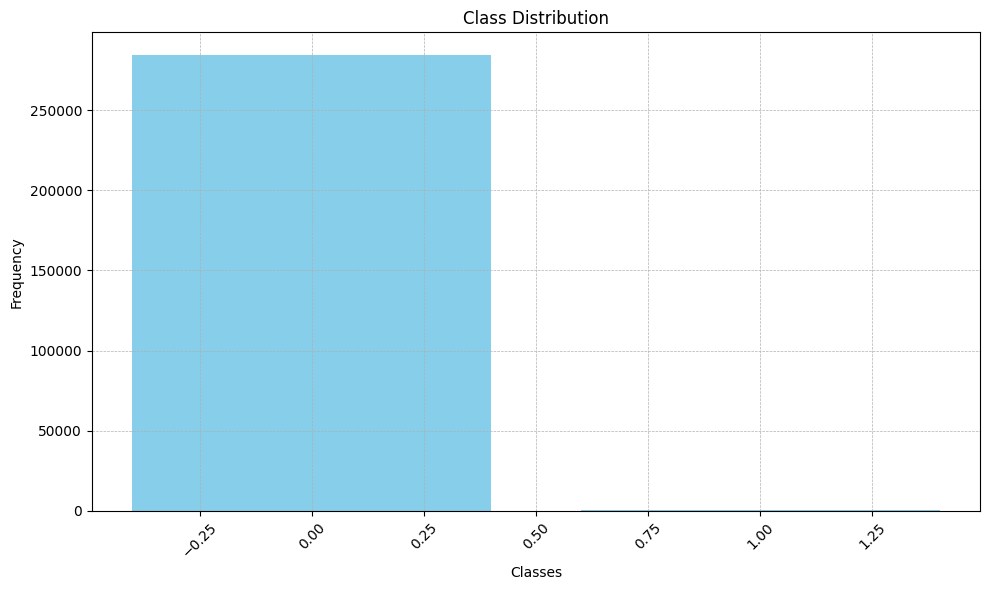

In [20]:
class_distribution = Y.value_counts()

# Extract class names and their counts
classes = class_distribution.index
counts = class_distribution.values

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')

# Add titles and labels
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout to fit labels without overlap
plt.show()

# Standard Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

# class balancing

In [22]:
#over sampling data
over_sample = SMOTE()
x_smote,y_smote = over_sample.fit_resample(x_scaler,Y)


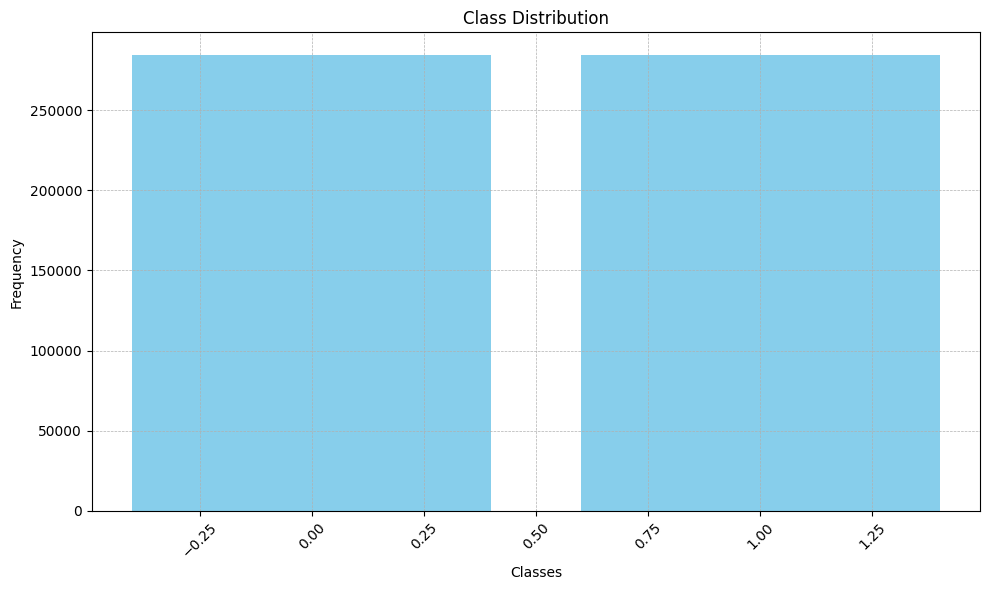

In [23]:
class_distribution = y_smote.value_counts()

# Extract class names and their counts
classes = class_distribution.index
counts = class_distribution.values

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')

# Add titles and labels
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout to fit labels without overlap
plt.show()

In [24]:
y_smote.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

# Model Training

In [25]:
#data split
X_train,X_test,Y_train,Y_test=train_test_split(x_smote,y_smote,test_size=0.2)

# NAIVE BAYES

In [26]:
from sklearn.naive_bayes import GaussianNB


In [27]:
model_naive=GaussianNB()
#training
model_naive.fit(X_train,Y_train)


GaussianNB()

In [28]:
#testing
y_pred_naive=model_naive.predict(X_test)

In [29]:
#accuracy
accuracy_naive=accuracy_score(y_pred_naive,Y_test)
accuracy_naive

0.9135817667024251

# confusion matrix

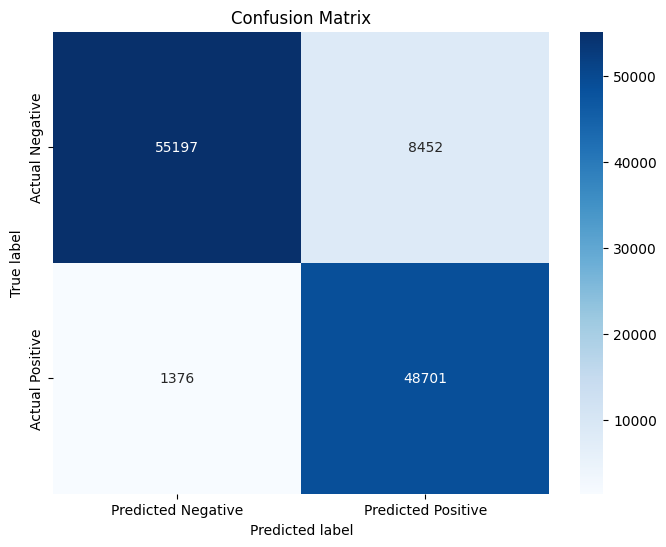

In [30]:
cm_2 = confusion_matrix(y_pred_naive, Y_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(classification_report(Y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     56573
           1       0.97      0.85      0.91     57153

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



# logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model_log=LogisticRegression()
#training
model_log.fit(X_train,Y_train)

LogisticRegression()

In [34]:
#testing
y_pred_log=model_log.predict(X_test)

In [35]:
#accuracy
accuracy_log=accuracy_score(y_pred_log,Y_test)
accuracy_log

0.9437947347132581

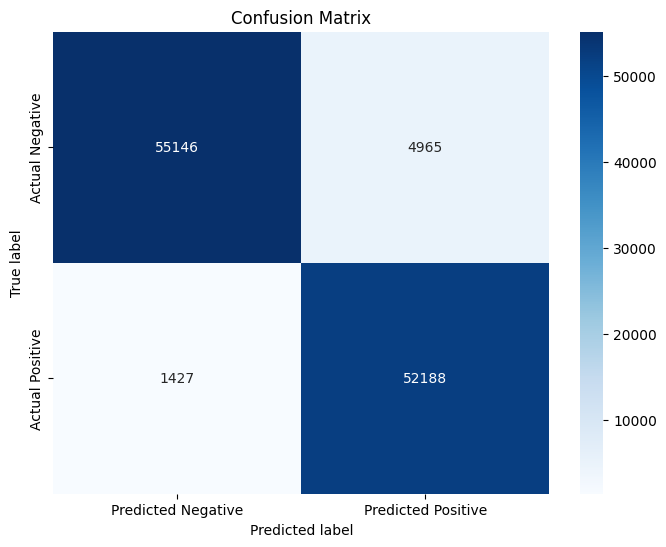

In [36]:
cm_3 = confusion_matrix(y_pred_log, Y_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(Y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56573
           1       0.97      0.91      0.94     57153

    accuracy                           0.94    113726
   macro avg       0.95      0.94      0.94    113726
weighted avg       0.95      0.94      0.94    113726



# Decision Tree

In [38]:
from sklearn import tree

In [39]:
model_tree=tree.DecisionTreeClassifier()
#training
model_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
#testing
y_pred_tree=model_tree.predict(X_test)

In [41]:
#accuracy
accuracy_tree=accuracy_score(y_pred_tree,Y_test)
accuracy_tree

0.9980655259131597

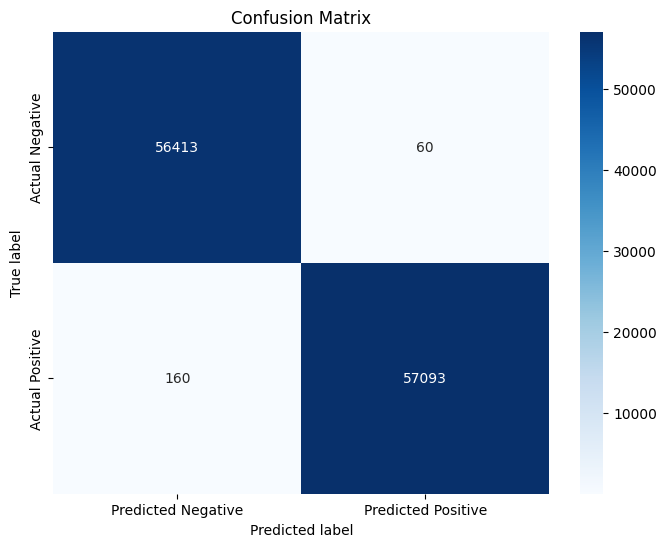

In [42]:
cm_4 = confusion_matrix(y_pred_tree, Y_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
print(classification_report(Y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56573
           1       1.00      1.00      1.00     57153

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# Correlation Matrix

In [44]:

# correlation matrix
correlation_matrix = data.corr()

# Set the threshold for absolute correlation coefficient
threshold = 0.2

# Select features with correlation coefficient above the threshold
selected_features = correlation_matrix['Class'][abs(correlation_matrix['Class']) > threshold].index

# Display selected features
print("Selected Features:")
print(selected_features)

# Create a new DataFrame with only the selected features
selected_df = data[selected_features]

Selected Features:
Index(['V10', 'V12', 'V14', 'V17', 'Class'], dtype='object')


In [45]:
selected_df

,V10,V12,V14,V17,Class
0,0.090794,-0.617801,-0.311169,0.207971,0
1,-0.166974,1.065235,-0.143772,-0.114805,0
2,0.207643,0.066084,-0.165946,1.109969,0
3,-0.054952,0.178228,-0.287924,-0.684093,0
4,0.753074,0.538196,-1.119670,-0.237033,0
...,...,...,...,...,...
284802,4.356170,2.711941,4.626942,1.991691,0
284803,-0.975926,0.915802,-0.675143,-0.025693,0
284804,-0.484782,0.063119,-0.510602,0.313502,0
284805,-0.399126,-0.962886,0.449624,0.509928,0


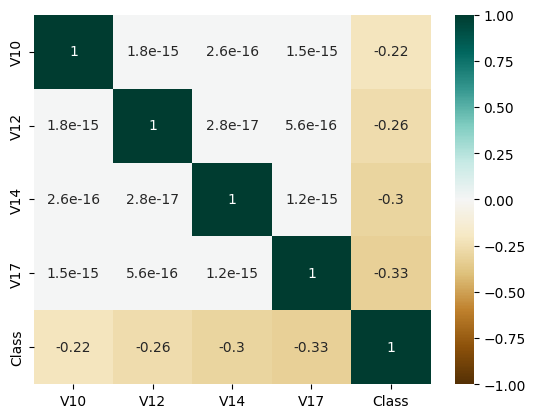

In [46]:
# correlation matrx
import seaborn as sns

sns.heatmap(selected_df.corr(), vmin=-1, vmax=1,
annot=True,cmap='BrBG')
plt.show()

In [47]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [48]:
selected_df

,V10,V12,V14,V17,Class
0,0.090794,-0.617801,-0.311169,0.207971,0
1,-0.166974,1.065235,-0.143772,-0.114805,0
2,0.207643,0.066084,-0.165946,1.109969,0
3,-0.054952,0.178228,-0.287924,-0.684093,0
4,0.753074,0.538196,-1.119670,-0.237033,0
...,...,...,...,...,...
284802,4.356170,2.711941,4.626942,1.991691,0
284803,-0.975926,0.915802,-0.675143,-0.025693,0
284804,-0.484782,0.063119,-0.510602,0.313502,0
284805,-0.399126,-0.962886,0.449624,0.509928,0


In [49]:
#input split
x=selected_df[['V10','V12','V14','V17']]
#target variable
y=selected_df['Class']

In [50]:
#Standardizing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler_corr = sc.fit_transform(x)

In [51]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [52]:
#sampling
over_sample = SMOTE()
xc_smote,yc_smote = over_sample.fit_resample(x_scaler_corr,y)

In [53]:
yc_smote

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [54]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(xc_smote,yc_smote,test_size=0.2)

# Naive Bayes

In [55]:
model_naive_corr=GaussianNB()

In [56]:
#training
model_naive_corr.fit(x_train,y_train)

GaussianNB()

In [57]:
#testing
y_pred_naive_corr=model_naive_corr.predict(x_test)

In [58]:
#accuracy
accuracy_naive_corr=accuracy_score(y_pred_naive_corr,y_test)

In [59]:
accuracy_naive_corr

0.9183651935353393

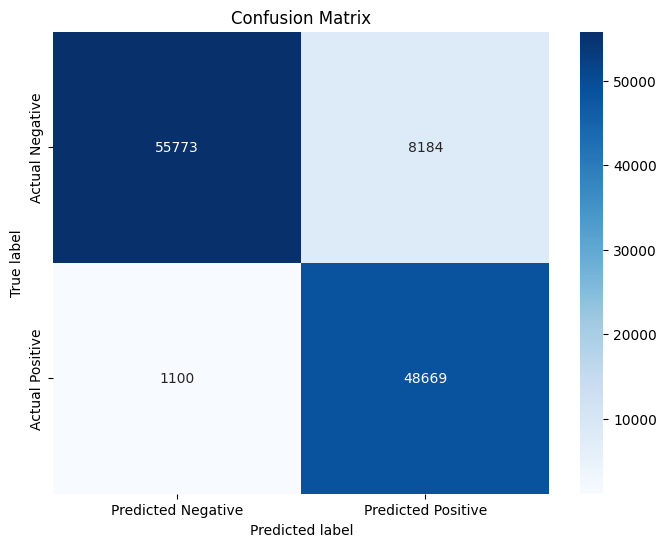

In [60]:
#confusion matrix
cm_6 = confusion_matrix(y_pred_naive_corr, y_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_6, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print(classification_report(y_test, y_pred_naive_corr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     56873
           1       0.98      0.86      0.91     56853

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



# Logistic Regression

In [62]:
model_log_corr=LogisticRegression()

In [63]:
#training
model_log_corr.fit(x_train,y_train)

LogisticRegression()

In [64]:
#testing
y_pred_log_corr=model_log_corr.predict(x_test)

In [65]:
#accuracy
accuracy_log_corr=accuracy_score(y_pred_log_corr,y_test)

In [66]:
accuracy_log_corr

0.9277561859205459

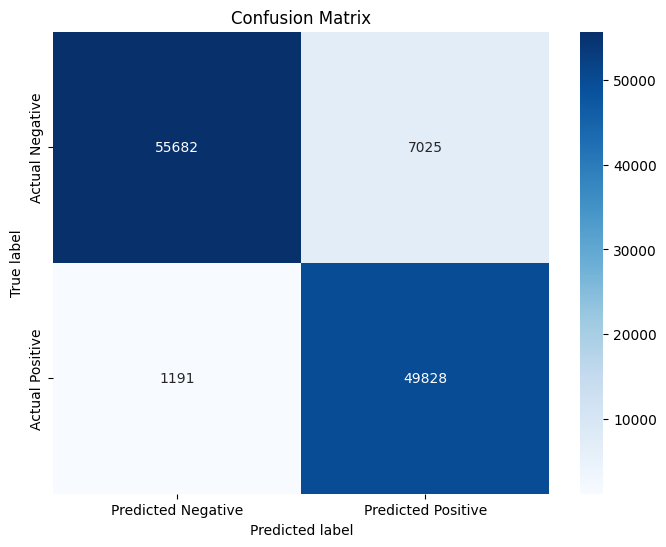

In [67]:
#confusion matrix
cm_7 = confusion_matrix(y_pred_log_corr, y_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_7, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [68]:
print(classification_report(y_test, y_pred_log_corr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56873
           1       0.98      0.88      0.92     56853

    accuracy                           0.93    113726
   macro avg       0.93      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726



# Decision Tree

In [69]:

model_tree_corr=tree.DecisionTreeClassifier()

In [70]:
#training
model_tree_corr.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
#testing
y_pred_tree_corr=model_tree_corr.predict(x_test)

In [72]:
#accuracy
accuracy_tree_corr=accuracy_score(y_pred_tree_corr,y_test)

In [73]:
accuracy_tree_corr

0.994372439020101

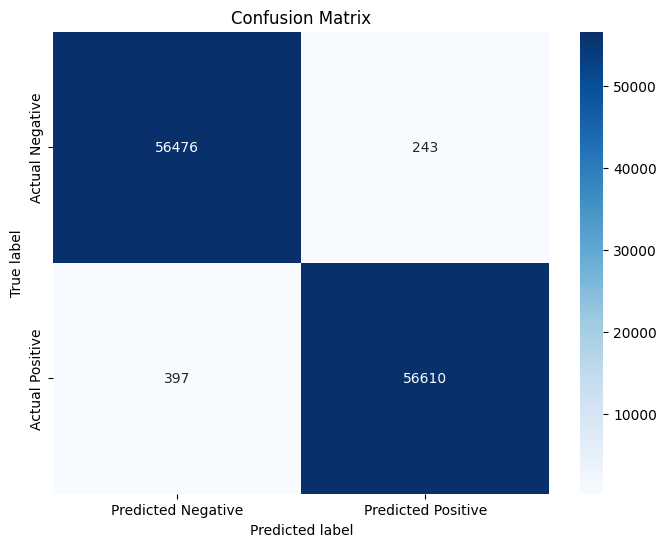

In [74]:
#confusion matrix
cm_8 = confusion_matrix(y_pred_tree_corr, y_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_8, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [75]:
print(classification_report(y_test, y_pred_tree_corr))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56873
           1       0.99      1.00      0.99     56853

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [76]:
val={
    'Models':['Gaussian','Logistic regression','Decision Tree'],
    'with correlation' : [accuracy_naive,accuracy_log,accuracy_tree],
    'without correlation':[accuracy_naive_corr,accuracy_log_corr,accuracy_tree_corr]
}

In [77]:
df=pd.DataFrame(val)

In [78]:
df

,Models,with correlation,without correlation
0,Gaussian,0.913582,0.918365
1,Logistic regression,0.943795,0.927756
2,Decision Tree,0.998066,0.994372


In [79]:
import matplotlib.pyplot as plt

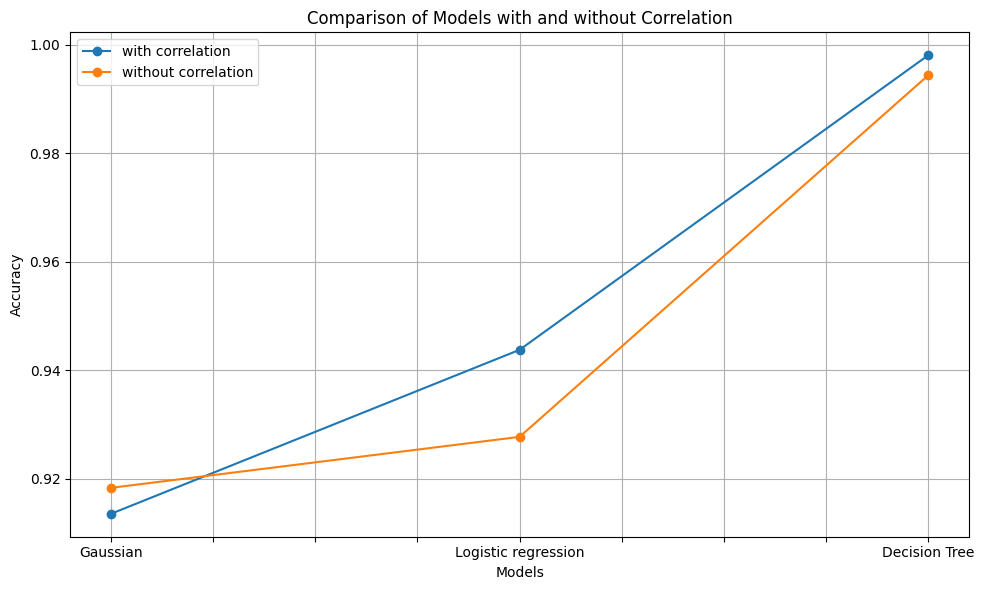

In [80]:
df.set_index('Models', inplace=True)

# Plot the line graph
df.plot(kind='line', marker='o', figsize=(10, 6))

# Set the title and labels
plt.title('Comparison of Models with and without Correlation')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.legend()
plt.show()